In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split, KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import datasets



C:\Users\JOLA\AppData\Local\Temp\ipykernel_5304\647979012.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv("neo.csv")

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
##korelacja
dfcor = pd.DataFrame(df)

correlation = df[['hazardous', 'est_diameter_min', 'est_diameter_max',
                  'relative_velocity', 'miss_distance', 'absolute_magnitude']].corr()

correlation


,hazardous,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
hazardous,1.000000,0.183363,0.183363,0.191185,0.042302,-0.365267
est_diameter_min,0.183363,1.000000,1.000000,0.221553,0.142241,-0.560188
est_diameter_max,0.183363,1.000000,1.000000,0.221553,0.142241,-0.560188
relative_velocity,0.191185,0.221553,0.221553,1.000000,0.327169,-0.353863
miss_distance,0.042302,0.142241,0.142241,0.327169,1.000000,-0.264168
absolute_magnitude,-0.365267,-0.560188,-0.560188,-0.353863,-0.264168,1.000000


In [8]:
df1 = pd.DataFrame(df[['hazardous', 'est_diameter_min', 'est_diameter_max','relative_velocity', 
                       'miss_distance', 'absolute_magnitude']]
)

df1


,hazardous,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,False,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,True,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,False,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,False,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,True,0.255009,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...,...,...
90831,False,0.026580,0.059435,52078.886692,1.230039e+07,25.00
90832,False,0.016771,0.037501,46114.605073,5.432121e+07,26.00
90833,False,0.031956,0.071456,7566.807732,2.840077e+07,24.60
90834,False,0.007321,0.016370,69199.154484,6.869206e+07,27.80


In [9]:
X = df1[df1.columns[:-1]]
Y = df1[df1.columns[-1]]
tree = DecisionTreeRegressor().fit(X,Y)

In [12]:
feature_columns = ['est_diameter_min','est_diameter_max','relative_velocity','miss_distance',
           'absolute_magnitude', 'sentry_object', 'orbiting_body']
target = 'hazardous'
X = df[ feature_columns + [target]].dropna()
X = pd.get_dummies(X, columns = ['sentry_object','orbiting_body'])
Y = X[target]
X = X.drop(columns=target)
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,sentry_object_False,orbiting_body_Earth
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,1,1
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,1,1
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,1,1
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,1


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=50, stratify=df['hazardous'])

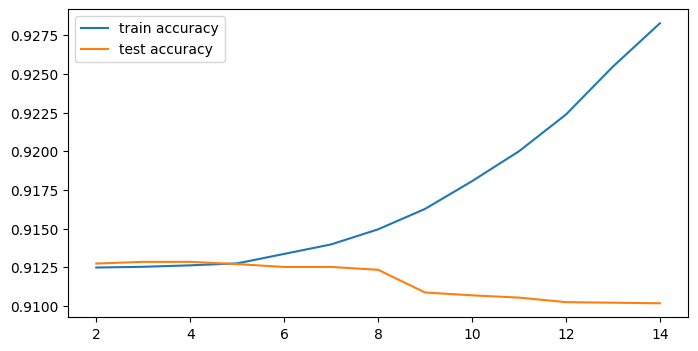

In [21]:
max_depths = list(range(2,15))
train_acc = []
test_acc = []

for param in max_depths:
    model = DecisionTreeClassifier(max_depth=param).fit(X_train,Y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train,Y_train))
    test_acc.append(accuracy_score(predict_test,Y_test))
    
plt.figure(figsize = (8,4))
plt.plot(max_depths, train_acc, label = 'train accuracy')
plt.plot(max_depths, test_acc, label = 'test accuracy')
plt.legend()
plt.show()   

In [19]:
model = DecisionTreeClassifier(random_state= 100).fit(X_train,Y_train)
print(model.feature_importances_)

[0.28998709 0.05875393 0.27722657 0.30962228 0.06441013 0.
 0.        ]


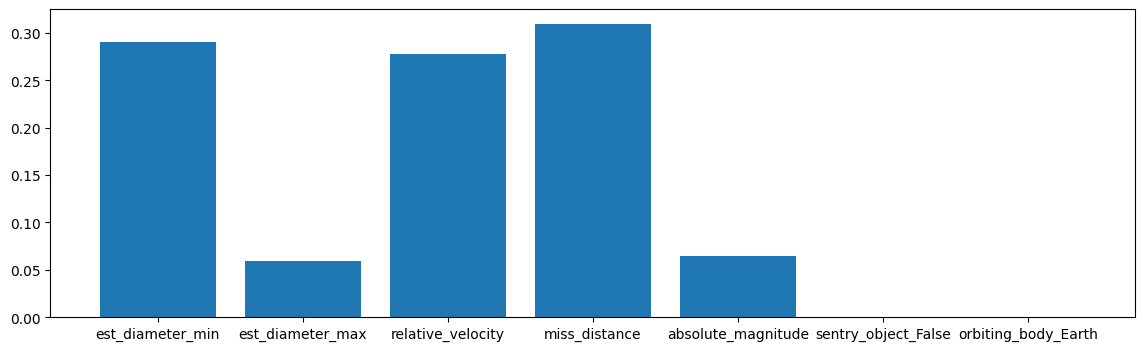

In [20]:
plt.figure(figsize = (14,4))
plt.bar(X.columns, model.feature_importances_)
plt.show()

In [25]:
accuracy = accuracy_score(Y_train, predict_train)
accuracy

0.9282692458913265

In [26]:
###walidacja krzyżowa
scores = cross_val_score(model, X, Y, cv=5) 
print(scores)

[0.903952   0.906754   0.90950625 0.90989156 0.91275389]


In [27]:
cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model, X, Y, cv=cv)
print(scores)

[0.91176794 0.90983652 0.91209336 0.90774481 0.91071723]
